<a href="https://colab.research.google.com/github/22130056-HoHoangDuy/Labs_ML/blob/main/22130056_HoHoangDuy_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Import Libraries
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import joblib
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [70]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Labs_Datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_Labs_Datasets


In [71]:
#Task1
cancer = datasets.load_breast_cancer()

In [72]:
#Task1.1
def prepare_data(X, y, test_size=0.3, scale=True, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [73]:
#Task1.2
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

    return metrics

In [74]:
#Task1.3
def select_features(X_train, y_train, X_test, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    return X_train_selected, X_test_selected, selector.get_support()

In [75]:
#Run
def run_models(X, y, use_feature_selection=False, k_features=10):
    X_train, X_test, y_train, y_test = prepare_data(X, y)

    if use_feature_selection:
        X_train, X_test, selected = select_features(X_train, y_train, X_test, k=k_features)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'kNN': KNeighborsClassifier(),
        'SVM (Linear)': SVC(kernel='linear')
    }

    results = {}
    for name, model in models.items():
        trained = train_model(model, X_train, y_train)
def run_models(X, y, use_feature_selection=False, k_features=10):
    X_train, X_test, y_train, y_test = prepare_data(X, y)

    if use_feature_selection:
        X_train, X_test, selected = select_features(X_train, y_train, X_test, k=k_features)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'kNN': KNeighborsClassifier(),
        'SVM (Linear)': SVC(kernel='linear')
    }

    results = {}
    for name, model in models.items():
        trained = train_model(model, X_train, y_train)
        metrics = evaluate_model(trained, X_test, y_test)
        results[name] = metrics
    return pd.DataFrame(results).T

In [76]:

data = load_breast_cancer()
X = data.data
y = data.target
print("Kết quả không chọn lọc đặc trưng:")
print(run_models(X, y, use_feature_selection=False))
print("Kết quả SAU khi chọn lọc đặc trưng (10 đặc trưng):")
print(run_models(X, y, use_feature_selection=True, k_features=10))

Kết quả không chọn lọc đặc trưng:
                     accuracy  precision    recall  f1_score
Logistic Regression  0.988304   0.990654  0.990654  0.990654
Decision Tree        0.912281   0.933962  0.925234  0.929577
kNN                  0.959064   0.938596  1.000000  0.968326
SVM (Linear)         0.982456   0.981481  0.990654  0.986047
Kết quả SAU khi chọn lọc đặc trưng (10 đặc trưng):
                     accuracy  precision    recall  f1_score
Logistic Regression  0.935673   0.944444  0.953271  0.948837
Decision Tree        0.929825   0.935780  0.953271  0.944444
kNN                  0.947368   0.945455  0.971963  0.958525
SVM (Linear)         0.953216   0.945946  0.981308  0.963303


In [77]:
#Task2
mobile_train = pd.read_csv('mobile_train.csv')
mobile_test = pd.read_csv('mobile_test.csv')
mobile_test.drop(columns=['id'], inplace=True)

mobile_X = mobile_train.drop('price_range', axis=1)
mobile_y = mobile_train['price_range']
features = mobile_X.columns

In [78]:
#Task2.1
#The problem of data optimization remains unresolved
def run_svm_with_kernels(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    results = {}
    for kernel in kernels:
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[kernel] = accuracy
    return results
print(run_svm_with_kernels(mobile_X, mobile_y))

{'linear': 0.9733333333333334, 'poly': 0.9533333333333334, 'rbf': 0.9533333333333334, 'sigmoid': 0.18666666666666668}


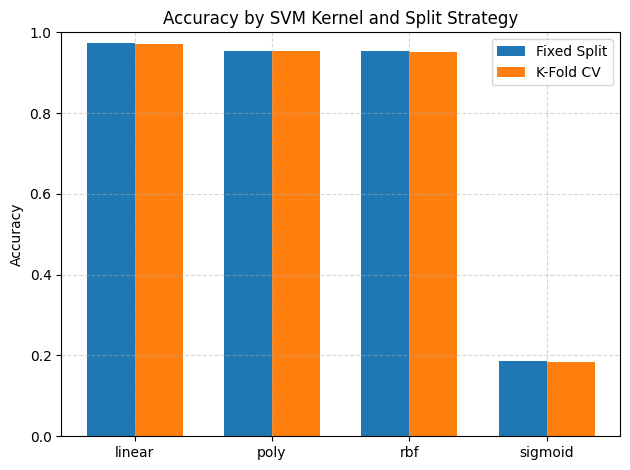

In [79]:
#Compare 2 ways: K-Fold and Fixed Split to slove the problem data optimization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def fixed_split_svm(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    results = {}
    for kernel in kernels:
        model = SVC(kernel=kernel)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[kernel] = accuracy
    return results

def cross_val_svm(X, y, k=5):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    results = {}
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for kernel in kernels:
        model = SVC(kernel=kernel)
        scores = cross_val_score(model, X, y, cv=cv)
        results[kernel] = np.mean(scores)
    return results

def compare_and_plot(X, y):
    fixed_results = fixed_split_svm(X, y)
    cv_results = cross_val_svm(X, y)

    kernels = list(fixed_results.keys())
    fixed_scores = [fixed_results[k] for k in kernels]
    cv_scores = [cv_results[k] for k in kernels]

    x = np.arange(len(kernels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, fixed_scores, width, label='Fixed Split')
    ax.bar(x + width/2, cv_scores, width, label='K-Fold CV')

    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy by SVM Kernel and Split Strategy')
    ax.set_xticks(x)
    ax.set_xticklabels(kernels)
    ax.legend()
    plt.ylim(0, 1)  # Độ chính xác từ 0 đến 1
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Gọi hàm so sánh
compare_and_plot(mobile_X, mobile_y)


In [80]:
#Task2.1
#The data optimization problem is solved using the K-Fold method
def run_svm_with_kernels_kfold(X, y, k=5):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    results = {}
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    for kernel in kernels:
        model = SVC(kernel=kernel)
        scores = cross_val_score(model, X, y, cv=cv)
        results[kernel] = np.mean(scores)

    return results

results = run_svm_with_kernels_kfold(mobile_X, mobile_y, k=5)
print("K-Fold Cross Validation Results:")
for kernel, accuracy in results.items():
    print(f"{kernel}: {accuracy:.4f}")

def evaluate_svm_with_metrics(X, y, k=5):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    for kernel in kernels:
        print(f"\nKernel: {kernel}")
        model = SVC(kernel=kernel)
        y_pred = cross_val_predict(model, X, y, cv=cv)
        print(classification_report(y, y_pred))

K-Fold Cross Validation Results:
linear: 0.9710
poly: 0.9530
rbf: 0.9515
sigmoid: 0.1850


In [81]:
# Task 2.2
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(mobile_X, mobile_y)
print('Feature Importance:', rf.feature_importances_)
selector = SelectFromModel(rf, threshold="mean")
selector.fit(mobile_X, mobile_y)

X_new = selector.transform(mobile_X)
features_selected = mobile_X.columns[selector.get_support()]
print('Selected Features:', features_selected)

def evaluate_models(X, y):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier()
    }
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\n{name}")
        print("Accuracy :", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='macro'))
        print("Recall   :", recall_score(y_test, y_pred, average='macro'))
        print("F1 Score :", f1_score(y_test, y_pred, average='macro'))

evaluate_models(X_new, mobile_y)

Feature Importance: [0.07460184 0.0063116  0.02606854 0.00644839 0.02427436 0.00623685
 0.03469866 0.02329284 0.03895964 0.02203571 0.02745886 0.05563956
 0.05744761 0.49416339 0.02654661 0.02789211 0.03034681 0.00470159
 0.00662019 0.00625484]
Selected Features: Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

Logistic Regression
Accuracy : 0.9675
Precision: 0.9673686603354212
Recall   : 0.9675
F1 Score : 0.9673982360922659

Decision Tree
Accuracy : 0.8925
Precision: 0.892887558616383
Recall   : 0.8925
F1 Score : 0.8926150871015581

KNN
Accuracy : 0.9325
Precision: 0.9321863002626792
Recall   : 0.9325
F1 Score : 0.9323089099954771


In [82]:
#Task3
credit_data = pd.read_csv('credit.csv')

In [83]:
#Task3.1
df = credit_data
numerical_cols = ['duration', 'credit_amount', 'installment_commitment',
                  'residence_since', 'age', 'existing_credits', 'num_dependents']

categorical_cols = ['credit_history', 'purpose', 'personal_status', 'other_parties',
                    'property_magnitude', 'other_payment_plans', 'housing',
                    'job', 'own_telephone', 'foreign_worker']

ordinal_cols = ['checking_status', 'savings_status', 'employment']

target_col = 'class'

X = df.drop(columns=[target_col])
y = df[target_col]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('ord', OrdinalEncoder(), ordinal_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [84]:
#Task3.2
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='good'),
        'Recall': recall_score(y_test, y_pred, pos_label='good'),
        'F1 Score': f1_score(y_test, y_pred, pos_label='good')
    }
models = {
    'SVM (RBF kernel)': SVC(kernel='rbf'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = scores

print("\n Kết quả so sánh mô hình \n")
for model_name, metrics in results.items():
    print(f"{model_name}")
    for metric_name, score in metrics.items():
        print(f"  - {metric_name}: {score:.4f}")
    print()


 Kết quả so sánh mô hình 

SVM (RBF kernel)
  - Accuracy: 0.7533
  - Precision: 0.7586
  - Recall: 0.9474
  - F1 Score: 0.8426

Logistic Regression
  - Accuracy: 0.7367
  - Precision: 0.7664
  - Recall: 0.8947
  - F1 Score: 0.8256

Decision Tree
  - Accuracy: 0.6867
  - Precision: 0.7626
  - Recall: 0.7990
  - F1 Score: 0.7804

kNN
  - Accuracy: 0.7233
  - Precision: 0.7739
  - Recall: 0.8517
  - F1 Score: 0.8109



In [85]:
#Task3.3
def select_best_features(X_train, y_train, X_test, k=20):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)
    return X_train_new, X_test_new, selector
X_train_fs, X_test_fs, selector = select_best_features(X_train, y_train, X_test, k=20)
models_fs = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier()
}

results_fs = {}

for name, model in models_fs.items():
    scores = evaluate_model(model, X_train_fs, y_train, X_test_fs, y_test)
    results_fs[name] = scores

print("Kết quả sau khi chọn đặc trưng :\n")
for model_name, metrics in results_fs.items():
    print(f"{model_name}")
    for metric_name, score in metrics.items():
        print(f"  - {metric_name}: {score:.4f}")
    print()

Kết quả sau khi chọn đặc trưng :

Logistic Regression
  - Accuracy: 0.7200
  - Precision: 0.7451
  - Recall: 0.9091
  - F1 Score: 0.8190

Decision Tree
  - Accuracy: 0.6533
  - Precision: 0.7354
  - Recall: 0.7847
  - F1 Score: 0.7593

kNN
  - Accuracy: 0.7500
  - Precision: 0.7746
  - Recall: 0.9043
  - F1 Score: 0.8344

